In [ ]:
%%capture
!pip install lale aix360  xgboost

## **Project with Lale & AIX360**




PORTUGESE BANKING DATASET ANALYSIS

In [ ]:
import pandas as pd 
import lale
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Normalizer
from sklearn.tree import DecisionTreeRegressor as Tree
from lale.lib.lale import Hyperopt
import lale.helpers
lale.wrap_imported_operators()

In [ ]:
# !wget https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip

In [ ]:
# !unzip /content/bank.zip -d /content

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip

--2020-09-21 13:52:20--  https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 444572 (434K) [application/x-httpd-php]
Saving to: ‘bank-additional.zip’

bank-additional.zip 100%[===================>] 434.15K   592KB/s    in 0.7s    

2020-09-21 13:52:21 (592 KB/s) - ‘bank-additional.zip’ saved [444572/444572]



In [ ]:
!unzip /content/bank-additional.zip -d /content

Archive:  /content/bank-additional.zip
   creating: /content/bank-additional/
  inflating: /content/bank-additional/.DS_Store  
   creating: /content/__MACOSX/
   creating: /content/__MACOSX/bank-additional/
  inflating: /content/__MACOSX/bank-additional/._.DS_Store  
  inflating: /content/bank-additional/.Rhistory  
  inflating: /content/bank-additional/bank-additional-full.csv  
  inflating: /content/bank-additional/bank-additional-names.txt  
  inflating: /content/bank-additional/bank-additional.csv  
  inflating: /content/__MACOSX/._bank-additional  


In [ ]:
df1=pd.read_csv('/content/bank-additional/bank-additional-full.csv',sep=';')

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [ ]:
df1['y new']=df1.y.map(dict(yes=1,no=0))

In [ ]:
df1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,y new
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


In [ ]:
df1.education.describe()

count                 41188
unique                    8
top       university.degree
freq                  12168
Name: education, dtype: object

In [ ]:
df1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,y new
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

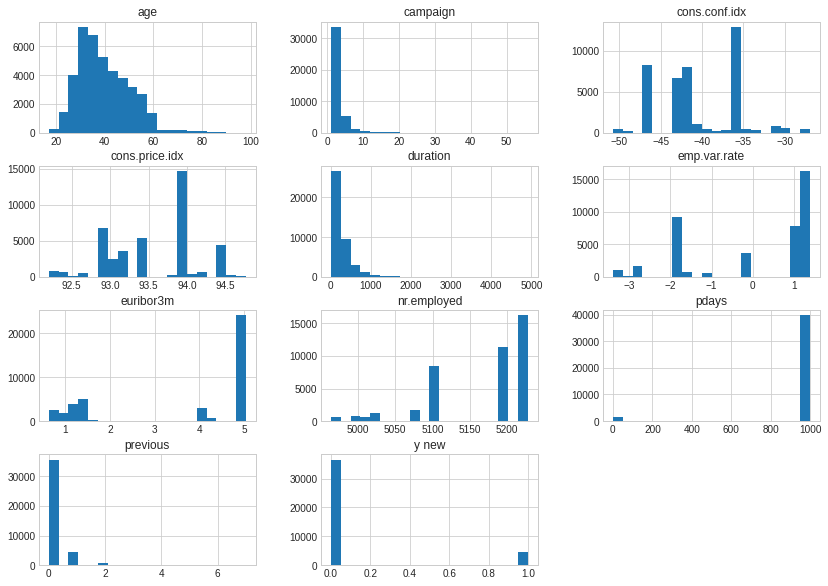

In [ ]:
plt.style.use('seaborn-whitegrid')
df1.hist(bins=20,figsize=(14,10))
plt.show()

In [ ]:
labels='Did not open term ','open term'

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

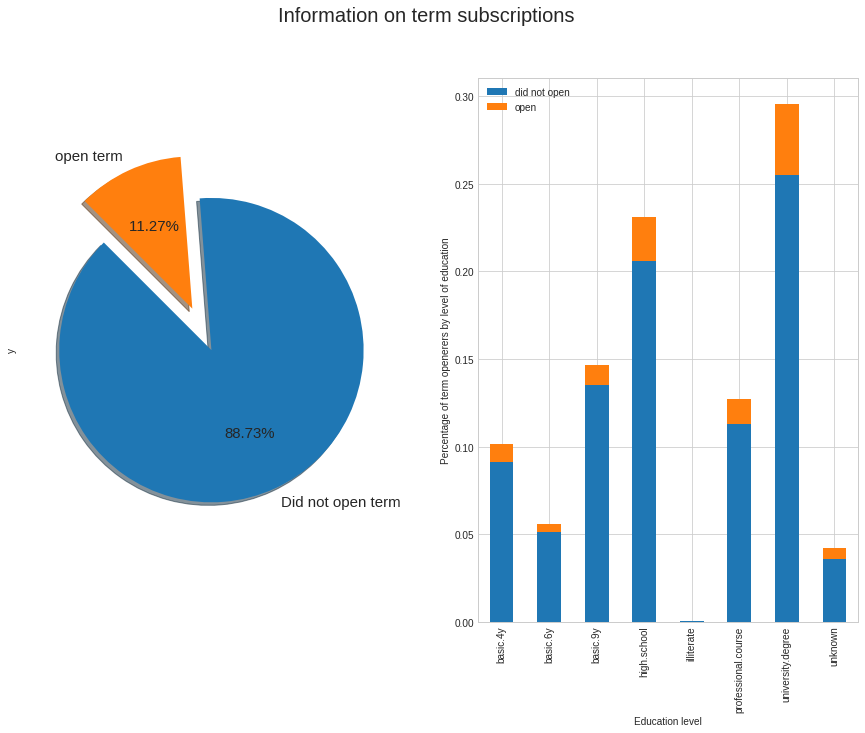

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(15,10))
df1['y'].value_counts().plot.pie(explode=[0,0.30],autopct='%1.2f%%',ax=ax[0],shadow=True,labels=labels,fontsize=15,startangle=135)
plt.suptitle('Information on term subscriptions',fontsize=20)

df2=df1.groupby(['education','y']).size().groupby(level=0).apply(lambda x: x/df1.shape[0]).unstack().plot(kind='bar',ax=ax[1],stacked=True)
ax[1].set(ylabel='Percentage of term openerers by level of education')
ax[1].set(xlabel='Education level')
ax[1].legend(['did not open','open'])




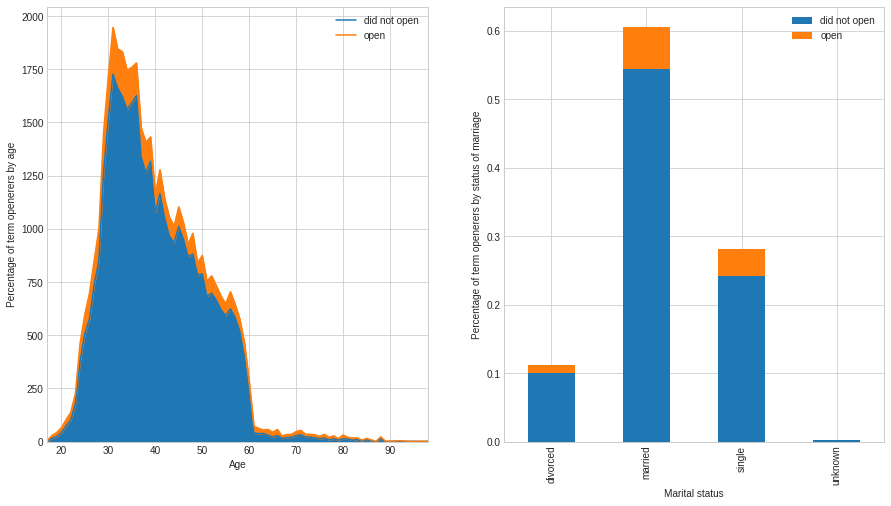

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(15,8))


df4=df1.groupby(['age','y']).size().groupby(level=0).apply(lambda x: x).unstack().plot(kind='area',ax=ax[0],stacked=True)
ax[0].set(ylabel='Percentage of term openerers by age')
ax[0].set(xlabel='Age')
ax[0].legend(['did not open','open'])

df3=df1.groupby(['marital','y']).size().groupby(level=0).apply(lambda x: x/df1.shape[0]).unstack().plot(kind='bar',ax=ax[1],stacked=True)
ax[1].set(ylabel='Percentage of term openerers by status of marriage')
ax[1].set(xlabel='Marital status')
ax[1].legend(['did not open','open'])


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
dependant_var=df1['y new']
encodedf=df1.copy()
encodedf=encodedf.drop(['y','y new'],axis=1)
encodedf=encodedf.apply(encoder.fit_transform)
encodedf.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,39,3,1,0,0,0,0,1,6,1,261,0,26,0,1,8,18,16,287,8
1,40,7,1,3,1,0,0,1,6,1,149,0,26,0,1,8,18,16,287,8
2,20,7,1,3,0,2,0,1,6,1,226,0,26,0,1,8,18,16,287,8
3,23,0,1,1,0,0,0,1,6,1,151,0,26,0,1,8,18,16,287,8
4,39,7,1,3,0,0,2,1,6,1,307,0,26,0,1,8,18,16,287,8


In [ ]:
encodedf=pd.concat([encodedf,dependant_var],axis=1)


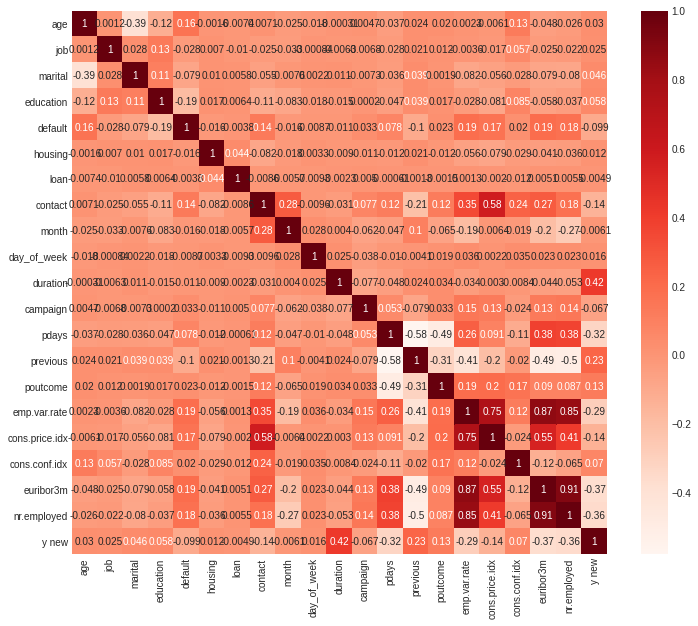

In [ ]:
plt.figure(figsize=(12,10))
cor=encodedf.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.Reds)
plt.show()

In [ ]:
cor_target=abs(cor['y new'])
relevant_features=cor_target[cor_target>0.2]
print(relevant_features)

duration        0.419889
pdays           0.320945
previous        0.230181
emp.var.rate    0.286833
euribor3m       0.368168
nr.employed     0.355135
y new           1.000000
Name: y new, dtype: float64


In [ ]:
encodedf[['duration','education']].corr()

,duration,education
duration,1.000000,-0.015364
education,-0.015364,1.000000


In [ ]:
encodedf=encodedf.drop(['age','housing','default','day_of_week','y new'],axis=1)

In [ ]:
df1.shape

(41188, 22)

In [ ]:
# train_len=int(0.7*(encodedf.shape[0]))
# x_train,y_train=encodedf[:train_len],dependant_var[:train_len]
# x_test,y_test=encodedf[train_len:],dependant_var[train_len:]

In [ ]:
encodedf.head()

,job,marital,education,loan,contact,month,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,3,1,0,0,1,6,261,0,26,0,1,8,18,16,287,8
1,7,1,3,0,1,6,149,0,26,0,1,8,18,16,287,8
2,7,1,3,0,1,6,226,0,26,0,1,8,18,16,287,8
3,0,1,1,0,1,6,151,0,26,0,1,8,18,16,287,8
4,7,1,3,2,1,6,307,0,26,0,1,8,18,16,287,8


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(encodedf, dependant_var, test_size=0.3)

In [ ]:
y_test.shape

(12357,)

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression(solver='lbfgs',penalty='l2',max_iter=10000)

log_reg_trained=log_reg.fit(x_train,y_train)

In [ ]:
print(f'the accuracy of training set is{log_reg.score(x_train,y_train)}')
# log_reg.score(x_train,y_train)

the accuracy of training set is0.9104436197148902


In [ ]:
pred1=log_reg.predict(x_test)
print(f'the test accuracy is {sk.metrics.accuracy_score(y_test,pred1)}')

the test accuracy is 0.911143481427531


In [ ]:
log_reg.coef_

array([[ 7.86029779e-03,  2.98533400e-02,  3.87863509e-02,
        -2.41505595e-02, -1.55748342e-01, -4.76842909e-02,
         2.59071715e-03, -2.40732512e-02, -3.03246512e-02,
        -6.30732570e-02,  1.65709434e-01, -7.45972081e-02,
         1.53227566e-03,  1.80247694e-03, -1.34873563e-03,
        -1.35761285e-01,  1.25174227e+01]])

###Now using lale for explainability

In [ ]:
from lale.lib.sklearn import PCA,LogisticRegression,KNeighborsClassifier as Kn,DecisionTreeClassifier as tree,SVC,RandomForestClassifier as rf
from lale.lib.xgboost import XGBClassifier
from lale.lib.lale import NoOp,ConcatFeatures,Hyperopt 

In [ ]:
import lale
import lale.helpers
import lale.operators
lale.wrap_imported_operators()

In [ ]:
import sklearn.metrics
sorted(sklearn.metrics.SCORERS.keys())

In [ ]:
explainable_pipe=lale.operators.make_union(PCA,NoOp) >> (LogisticRegression|tree|XGBClassifier)
expl_train=explainable_pipe.auto_configure(x_train,y_train,optimizer=Hyperopt,cv=3,max_evals=3,scoring='accuracy')

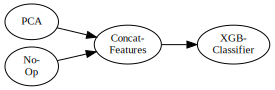

In [ ]:
expl_train.visualize()

In [ ]:
expl_train.pretty_print(show_imports =False,ipython_display=True)

```python
pca = PCA(n_components=0.1268338183958506, svd_solver="full")
xgb_classifier = XGBClassifier(
    booster="gblinear",
    colsample_bylevel=0.8800094729886384,
    colsample_bytree=0.24347633774591215,
    learning_rate=0.4596285154827624,
    max_depth=20,
    min_child_weight=2,
    n_estimators=1412,
    reg_alpha=0.3292628550216524,
    reg_lambda=0.8707348588077812,
    subsample=0.605086288753513,
)
pipeline = (pca & NoOp()) >> ConcatFeatures() >> xgb_classifier
```